<h1>Tarea integradora - Parte 1</h1>

In [153]:
# %matplotlib notebook
%matplotlib inline
import pandas
import numpy
import seaborn
import matplotlib.pyplot as plt
from scipy import stats # importando scipy.stats

In [154]:

seaborn.set_style('whitegrid')
seaborn.set_context('talk')

In [155]:
dataset = pandas.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/violencia-institucional-2018-01.csv',
                          encoding='utf8')

In [156]:
dataset[:3]

,area,organismo_origen,via_acceso,año,provincia,contexto,contexto1,circunstancia,alojamiento,violencia_fisica,violencia_psiquica,violencia_genero,violencia_salud,resumen_hecho,descripcion_institucion,establecimiento,Unnamed: 16
0,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 Junin,NaN
1,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,"Malas condiciones de alojamiento (higiene), Hu...",NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 DE JUNIN,NaN
2,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,Malas condiciones de alojamiento (higiene),NaN,NaN,NaN,NaN,NaN,Servicio Penitenciario Provincial,UPP Nº 36 de Magdalena,NaN


In [157]:
import six
def convert_to_int(row):
    try:
        return float(row)
    except ValueError:
        if isinstance(row, six.string_types):
            return float(row.split(',')[0])
        return row

dataset.loc[:,'year'] = dataset[u'año'].apply(convert_to_int)
# Se podrían también decodicar los nombres de provincias
# dataset.loc[:,'provincia'] = dataset.provincia.apply(lambda x: x.decode("utf-8"))

In [158]:
dataset.shape, dataset.year.dropna().shape

((1439, 18), (1316,))

### Ejercicio 1
* Crear una imagen mostrando la distribución de los eventos por año

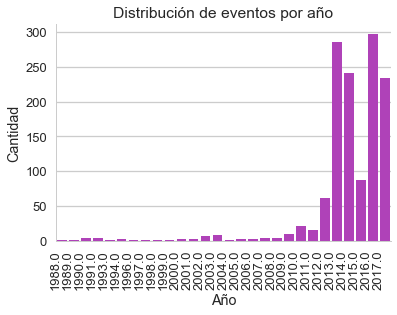

In [219]:
datos= dataset.year.dropna()
datos_1= datos.value_counts()
gr = seaborn.barplot(data=datos_1.to_frame().reset_index(),
        y='year', x='index', color='#c02ecc', orient="v")
gr.set_xticklabels(gr.get_xticklabels(), rotation=90, ha="right")
gr.set_xlabel('Año')
gr.set_ylabel('Cantidad')
gr.set_title('Distribución de eventos por año')
seaborn.despine()

* Construir una tabla de frecuencia de probabilidades dado el evento Y = ’año en el que ocurrió’

In [201]:
datos_2=datos.value_counts(normalize=True)
datos_2

2016.0    0.225684
2013.0    0.216565
2014.0    0.183131
2017.0    0.177812
2015.0    0.066109
2012.0    0.047112
2010.0    0.015957
2011.0    0.012158
2009.0    0.007599
2003.0    0.006839
2002.0    0.005319
2007.0    0.003799
1990.0    0.003799
2008.0    0.003799
1991.0    0.003799
2000.0    0.002280
1994.0    0.002280
2006.0    0.002280
2005.0    0.002280
2001.0    0.002280
1993.0    0.001520
1998.0    0.001520
2004.0    0.001520
1999.0    0.001520
1989.0    0.000760
1996.0    0.000760
1997.0    0.000760
1988.0    0.000760
Name: year, dtype: float64

* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado

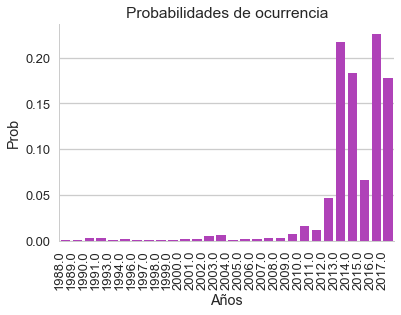

In [218]:
gr_1=seaborn.barplot(data=datos_2.to_frame().reset_index(),
        y='year', x='index',color='#c02ecc', orient="v")
gr_1.set_xticklabels(gr_1.get_xticklabels(), rotation=90, ha="right")
gr_1.set_xlabel('Años')
gr_1.set_ylabel('Prob')
gr_1.set_title('Probabilidades de ocurrencia')
seaborn.despine()

* ¿A qué se debe la forma de la distribución? ¿Qué tendencia muestra? ¿Ha aumentado la violencia institucional en los últimos años?

Se debe a que la violencia va creciendo en los ultimos años, la tendencia de la muestra es exponencial

* Calcular la función de distribución acumulada de la variable Y y graficarla. ¿Cuál es la probabilidad de que haya dado un acto de violencia antes del último cambio de gobierno?

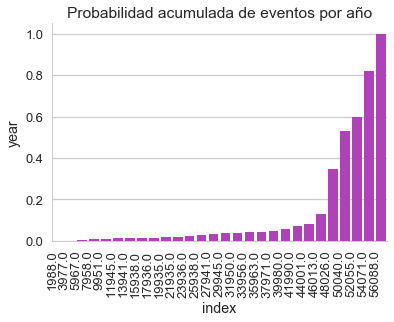

In [217]:
datos_3=datos_2.to_frame().reset_index().sort_values('index')
gr_3 = seaborn.barplot(data=datos_3.cumsum(),
        y='year', x='index', color='#c02ecc', orient="v")
gr_3.set_xticklabels(gr_3.get_xticklabels(), rotation=90, ha="right")
gr_3.set_title('Distribución acumulada de eventos por año')
seaborn.despine()

### Ejercicio 2

* Construir una tabla de frecuencia de probabilidades dado el evento X = ’provincia donde se desarrollo el hecho’

In [224]:
provincia = dataset.provincia.dropna()
tb_prov= provincia.value_counts(normalize=True)
tb_prov

Buenos Aires              0.693182
Ciudad de Buenos Aires    0.083097
Córdoba                   0.036932
Chubut                    0.026278
Chaco                     0.020597
Rio Negro                 0.019176
Neuquen                   0.014915
Santa Fe                  0.014205
Mendoza                   0.012074
Salta                     0.012074
Misiones                  0.007812
Santiago del Estero       0.007102
La Pampa                  0.007102
Tucuman                   0.007102
Formosa                   0.007102
Entre Rios                0.006392
Jujuy                     0.006392
La Rioja                  0.004261
Corrientes                0.003551
Santa Cruz                0.002841
San Luis                  0.002841
San Juan                  0.002131
Catamarca                 0.001420
Tierra del Fuego          0.001420
Name: provincia, dtype: float64

* ¿Qué información adicional es necesaria para mostrar estos datos de manera más adecuada?

Ver según la cantidad de Habitantes por provincia cuantos hechos de violencia hay, ya que en este caso nos es relevante 
ver la cantindad por provincia, ya que por ejemplo buenos aires simpre va estar primero ya que tiene mas cantidad de habitantes que el resto de las provincias.

* Muestre la distribución de los eventos visualmente. ¿Qué tipo de gráfico es más adecuado para mostrar esta información?

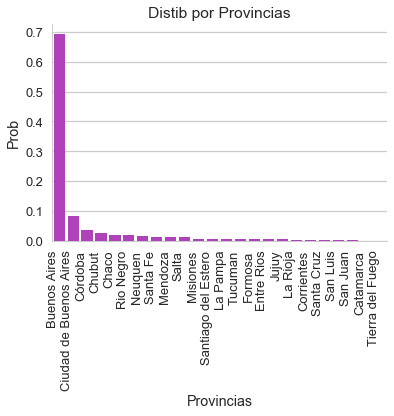

In [228]:
gr_4=seaborn.barplot(data=tb_prov.to_frame().reset_index(),
        y='provincia', x='index',color='#c02ecc', orient="v")
gr_4.set_xticklabels(gr_4.get_xticklabels(), rotation=90, ha="right")
gr_4.set_xlabel('Provincias')
gr_4.set_ylabel('Prob')
gr_4.set_title('Distib por Provincias')
seaborn.despine()

### Ejercicio 2

* Construir una tabla de doble entrada donde se observen las función de distribución de probabilidades con las 2 variables aleatorias anteriores. ¿Son eventos independientes?

Que un hecho de violencia institucional suceda en una provincia y en un año en particular se ve como eventos independientes. Pero si se tiene en cuenta que puede haber problemas a nivel provicial en ese año ahí dejan de ser eventos independientes, como por ejemplo crisis economica. 

In [229]:
pandas.crosstab(index=dataset.year,
            columns=dataset.provincia, margins=True)

provincia,Buenos Aires,Catamarca,Chaco,Chubut,Ciudad de Buenos Aires,Corrientes,Córdoba,Entre Rios,Formosa,Jujuy,...,Rio Negro,Salta,San Juan,San Luis,Santa Cruz,Santa Fe,Santiago del Estero,Tierra del Fuego,Tucuman,All
year,,,,,,,,,,,,,,,,,,,,,
1988.0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1989.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1990.0,0,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1991.0,3,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1993.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,2
1994.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,3
1996.0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1997.0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1998.0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado.

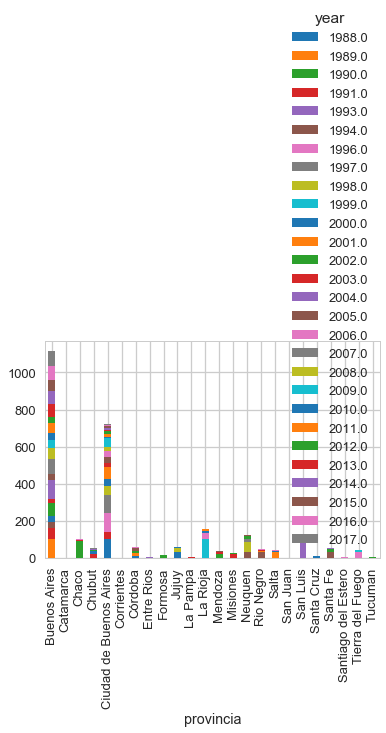

In [236]:
plot = pandas.crosstab(index=dataset.provincia,
            columns=dataset.year
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)